# Installing Dependencies

In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(os.path.join('data','train.csv'))
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

# Preprocess

In [4]:
from tensorflow.keras.layers import TextVectorization

In [5]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [6]:
MAX_FEATURE = 200000 # Number of Features

In [7]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURE,
                               output_sequence_length = 1800,
                               output_mode='int')

In [8]:
vectorizer.adapt(X.values)

In [9]:
vectorized_text = vectorizer(X.values)

In [10]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [11]:
train = dataset.take(int(len(dataset)*0.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*0.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*0.1))

# Deep Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional , Dense , Embedding

In [13]:
model = Sequential()

model.add(Embedding(MAX_FEATURE+1,32))

model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(6,activation='sigmoid'))

In [14]:
model.compile(loss='BinaryCrossentropy' , optimizer = 'Adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [16]:
# train for 10-15 epochs
history = model.fit(train,epochs=1,validation_data=val)

KeyboardInterrupt: 

In [ ]:
model.save('toxic.h5')

In [ ]:
history.history

{'loss': [0.06461990624666214],
 'accuracy': [0.9842339754104614],
 'val_loss': [0.052426546812057495],
 'val_accuracy': [0.9939819574356079]}

In [ ]:
import matplotlib.pyplot as plt

<Figure size 800x500 with 0 Axes>

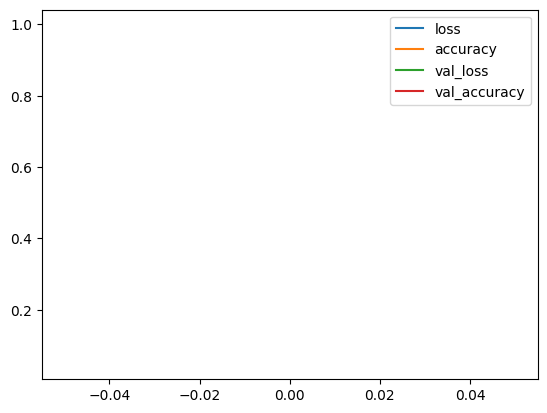

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Make Prediction

In [ ]:
text = vectorizer("You are fucking joke.You should die!")
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
res = model.predict(np.expand_dims(text,0))
res

1/1 [==============================] - 0s 162ms/step


array([[0.99806815, 0.42873773, 0.96167785, 0.05413187, 0.7835983 ,
        0.24896426]], dtype=float32)

In [ ]:
batch = test.as_numpy_iterator().next()

In [ ]:
batch_X , batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X)>0.5).astype(int)

1/1 [==============================] - 0s 190ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

# Evalaute model

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision , Recall,CategoricalAccuracy

In [22]:
model = load_model('toxic.h5')

In [23]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [19]:
for batch in test.as_numpy_iterator():
    X_true , y_true = batch 
    yhat = model.predict(X_true)

    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(yhat,y_true)
    re.update_state(yhat,y_true)
    acc.update_state(yhat,y_true)

1/1 [==============================] - 0s 86ms/step


In [20]:
print(f'Precision : {pre.result().numpy()} , Recall : {re.result().numpy()} , Accuracy : {acc.result().numpy()}')

Precision : 1.0 , Recall : 0.03590981289744377 , Accuracy : 0.001003009034320712


# App on Gradio

In [ ]:
%pip install gradio jinja2

Note: you may need to restart the kernel to use updated packages.


In [24]:
import gradio as gr

c:\Users\Santosh\Desktop\Projects\Comment Toxicity\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
model = tf.keras.models.load_model('toxic.h5')

In [26]:
input_str = vectorizer("you fucking fat pig!i will kill you")
res = model.predict(np.expand_dims(input_str,0))
res

1/1 [==============================] - 1s 536ms/step


array([[0.9991385 , 0.49834183, 0.9737811 , 0.05888152, 0.80838597,
        0.2741692 ]], dtype=float32)

In [27]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    result = model.predict(vectorized_comment)

    text = ''
    for idx,col in enumerate(df.columns[2:-1]):
        text+='{} : {}\n'.format(col,result[0][idx]>0.5)
    return text

In [28]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2,placeholder='Comment to score'),
                         outputs='text')

In [ ]:
interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 [==============================] - 0s 177ms/step
